# Color Space Test
https://en.wikipedia.org/wiki/HSL_and_HSV#Lightness

- Grayscale: Intensity is defined as the arithmetic mean of RGB channels
- Lightness channel of HLS : Lightness is defined as the average of the largest and smallest color components
- Value channel of HSV : Value is defined as the largest component of a color

In [1]:
import random
import numpy
from datetime import datetime
from src.data.ParkingProvider import NoSpacesException, NoImageException
from src.metrics.PerformanceMetricsProviderSklearn import PerformanceMetricsProviderSklearn
from src.metrics.entity.PerformanceMetrics import PerformanceMetrics
from src.detector.entity.DetectionParams import DetectionParams
from src.data.ParkingProviderLocal import ParkingProviderLocalParams
from src.app.ParkingOccupancyProcessorLocal import ParkingOccupancyProcessorLocal
import cv2 as cv

metrics_list = list()
row_names = list()

def test_channel(channel, row_name, detection_params:DetectionParams, provider_params):
    detection_params.channel = channel
    metrics_provider: PerformanceMetricsProviderSklearn = PerformanceMetricsProviderSklearn()

    processor = ParkingOccupancyProcessorLocal(
        parking_provider_params=provider_params, detection_params=detection_params, performance_metrics_provider=metrics_provider)

    try:
        processor.process_batch()
    except (NoSpacesException, NoImageException) as ex:
        print(f"Finished processing samples: ", ex)

        
    metrics_provider.calculate_metrics()
    metrics_provider.show_confusion_matrix()

    metrics_list.append(metrics_provider.metrics)
    row_names.append(row_name)
    
def test_parking(parking_id, detection_params:DetectionParams): 
    
    # Fixed seed to get the same files selected
    provider_params = ParkingProviderLocalParams(
    parking_id=parking_id, path='E:\\Documents\\PKLot\\PKLot\\PKLot\\PKLot\\'+parking_id, k=25, random_seed=datetime.now().timestamp())
    
    test_channel('g', f"{str(parking_id)} channel 'G'ray", detection_params, provider_params)
    test_channel('l', f"{str(parking_id)} channel HS'L'", detection_params, provider_params)
    test_channel('v', f"{str(parking_id)} channel HS'V'", detection_params, provider_params)


## UFPR04

Selected 151 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Cloudy\2013-01-29\2013-01-29_18_06_20.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Cloudy\2012-12-28\2012-12-28_16_15_12.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Cloudy\2012-12-14\2012-12-14_11_00_07.jpg
Processing 151 files with 16 cores


100%|██████████| 151/151 [00:24<00:00,  6.19it/s]


Precision: 0.802
specificity: 0.840
Recall: 0.506
F1 Score: 0.621
Accuracy: 0.652


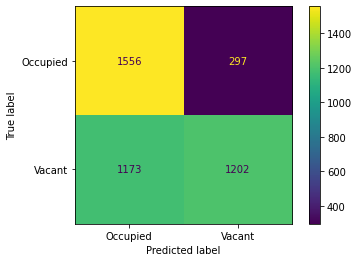

Selected 151 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Cloudy\2013-01-20\2013-01-20_19_10_15.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Cloudy\2012-12-15\2012-12-15_08_10_03.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Sunny\2012-12-24\2012-12-24_09_40_04.jpg
Processing 151 files with 16 cores


100%|██████████| 151/151 [00:25<00:00,  5.92it/s]

Precision: 0.865
specificity: 0.843
Recall: 0.754
F1 Score: 0.806
Accuracy: 0.792


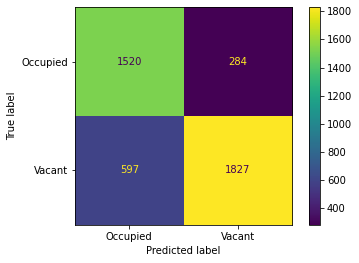

Selected 151 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Cloudy\2012-12-27\2012-12-27_10_45_06.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Sunny\2012-12-19\2012-12-19_11_50_07.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Cloudy\2012-12-14\2012-12-14_12_05_08.jpg
Processing 151 files with 16 cores


100%|██████████| 151/151 [00:24<00:00,  6.13it/s]


Precision: 0.875
specificity: 0.818
Recall: 0.797
F1 Score: 0.834
Accuracy: 0.805


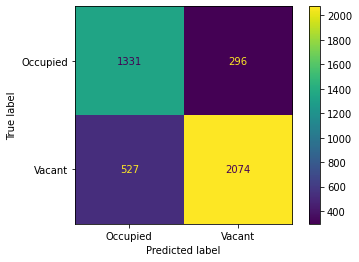

In [2]:
#Define global params for each parking
PARAMS_UFPR04 = DetectionParams((5, 5), 0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 29, 8, 3, 23, vacant_threshold=0.28)  # UFPR04
test_parking('UFPR04', PARAMS_UFPR04)

## UFPR05

In [ ]:
PARAMS_UFPR05 =  DetectionParams((5,5), 0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 33, 9, 3, 305,vacant_threshold=0.24) # UPR05

test_parking('UFPR05', PARAMS_UFPR05)

## PUCPR

In [ ]:
PARAMS_PUCPR = DetectionParams((5,5), 0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 27, 7, 3, 85, vacant_threshold=0.26) # PUCPR

test_parking('PUCPR', PARAMS_PUCPR)

# Total results

In [ ]:
PerformanceMetricsProviderSklearn.show_dataframe(metrics_list, row_names)

## Grayscale
##### Intensity is defined as the arithmetic mean of RGB channels

In [ ]:
PARAMS_UFPR04.channel = "g"

confusion_matrix, real, predicted = process_batch(selected_files, PARAMS_UFPR04)
precision, specificity, recall, f1, accuracy = show_confusion_matrix(confusion_matrix, real, predicted)

precision_total.append(precision)
specificity_total.append(specificity)
recall_total.append(recall)
f1_total.append(f1)
accuracy_total.append(accuracy)
row_names.append(f"Channel 'G'ray")

## Lightness channel of HLS
####  Lightness is defined as the average of the largest and smallest color components

In [ ]:
PARAMS_UFPR04.channel = "l"

confusion_matrix, real, predicted = process_batch(selected_files, PARAMS_UFPR04)
precision, specificity, recall, f1, accuracy = show_confusion_matrix(confusion_matrix, real, predicted)

precision_total.append(precision)
specificity_total.append(specificity)
recall_total.append(recall)
f1_total.append(f1)
accuracy_total.append(accuracy)
row_names.append(f"Channel HS'L'")

## Value channel of HSV
#### value is defined as the largest component of a color

In [ ]:
PARAMS_UFPR04.channel = "v"

confusion_matrix, real, predicted = process_batch(selected_files, PARAMS_UFPR04)
precision, specificity, recall, f1, accuracy = show_confusion_matrix(confusion_matrix, real, predicted)

precision_total.append(precision)
specificity_total.append(specificity)
recall_total.append(recall)
f1_total.append(f1)
accuracy_total.append(accuracy)
row_names.append(f"Channel HS'V'")

In [ ]:
import pandas as pd

data = {
  "precision": precision_total,
  "specificity": specificity_total,
  "recall": recall_total,
  "f1": f1_total,
  "accuracy": accuracy_total
}

df = pd.DataFrame(data, index = row_names)

print(df.round(3)) 